## First EDA 

Let's star by analyzing the dataset.  
The goal is understand what kind of data we have and start to figuring out some ideas to perform the preprocessing.

In [2]:
import pandas as pd
news_df = pd.read_csv('../data/development.csv', index_col=0)

In [3]:
news_df.head()

,source,title,article,page_rank,timestamp,label
Id,,,,,,
0,AllAfrica.com,OPEC Boosts Nigeria&#39;s Oil Revenue By .82m Bpd,THE Organisation of Petroleum Exporting Countr...,5,2004-09-16 22:39:53,5
1,Xinhua,Yearender: Mideast peace roadmap reaches dead-...,Looking back at the major events that took pla...,5,2004-12-17 19:01:14,0
2,Yahoo,Battleground Dispatches for Oct. 5 \\n (CQP...,CQPolitics.com - Here are today's Battleground...,5,2006-10-05 18:42:29,0
3,BBC,Air best to resuscitate newborns,Air rather than oxygen should be used to resus...,5,0000-00-00 00:00:00,0
4,Yahoo,High tech German train crash kills at least on...,"<p><a href=""http://us.rd.yahoo.com/dailynews/r...",5,2006-09-22 17:28:57,0


Strange timestamp: 0000-00-00 00:00:00 $\rightarrow$ a NaN 

In [4]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79997 entries, 0 to 79996
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   source     79997 non-null  object
 1   title      79996 non-null  object
 2   article    79996 non-null  object
 3   page_rank  79997 non-null  int64 
 4   timestamp  79997 non-null  object
 5   label      79997 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 4.3+ MB


In [5]:
longest_article_idx = news_df['article'].str.len().argmax()
print(news_df.loc[longest_article_idx].article)
print(len(news_df.loc[longest_article_idx].article))

<div class="rxbodyfield"><p class="ArticleBody" page="1">Another year of milestones and launches, and what do you have to show for it? A rekindled resolve to make your career in IT more worth your while this year in terms of the pay you take home.</p><p align="right"><a href="http://ad.doubleclick.net/jump/idg.us.info.rss/news;pos=imu;tile=6;sz=336x280;skey=patch_management;pkey=security;ord=123456789?" target="_blank" /><img src="http://ad.doubleclick.net/ad/idg.us.info.rss/news;pos=imu;tile=6;sz=336x280;skey=patch_management;pkey=security;ord=123456789?" width="336" height="280" border="0" alt="" align="right"/></a></p><p class="ArticleBody" page="1">Sure, there have been upticks in pay for IT pros since the downturn, as the <a href="http://www.infoworld.com/article/07/07/02/27FEcompsurvey_1.html" class="regularArticleU">2007 InfoWorld Compensation Survey</a> attests. And yes, projections by analysts such as <a href="http://www.roberthalftechnology.com/portal/site/rht-us/menuitem.e4a

In [6]:
news_df.loc[news_df['title'].str.len().argmax(), 'title']


"[ HoroscopeForecast for Today: Saturn and Neptune Are Both Powerful Outer Planetary Influences Taunting One Another From Opposite Sides of the Solar System. It's Like They're Superheroes and Each Has Named the Other As an Evil Nemesis. Only Neither is Evi"

page_rank
5    73891
4     3692
3     2371
2       43
Name: count, dtype: int64


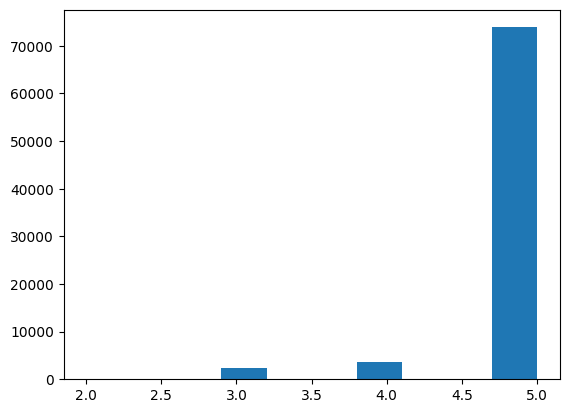

In [7]:
print(news_df['page_rank'].value_counts())
news_df['page_rank'].hist(grid=False);

In [8]:
news_df['source'].value_counts().sort_values(ascending=False) / news_df.shape[0] * 100

source
Yahoo              19.813243
Reuters            14.894309
BBC                 9.964124
New                 8.037801
Washington          4.228909
                     ...    
just-food.com       0.001250
Skipressworld       0.001250
Destination         0.001250
SaddoBoxing.com     0.001250
Kinston             0.001250
Name: count, Length: 1359, dtype: float64

---

In [9]:
news_df.isnull().sum()

source       0
title        1
article      1
page_rank    0
timestamp    0
label        0
dtype: int64

In [10]:
null_timestamp_idxs = news_df[news_df['timestamp'] == '0000-00-00 00:00:00'].index
news_df.loc[null_timestamp_idxs, 'timestamp'] = pd.NA

In [11]:
news_df.isna().sum()

source           0
title            1
article          1
page_rank        0
timestamp    27750
label            0
dtype: int64

In [12]:
news_df['timestamp'] = pd.to_datetime(news_df['timestamp'])

In [13]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79997 entries, 0 to 79996
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source     79997 non-null  object        
 1   title      79996 non-null  object        
 2   article    79996 non-null  object        
 3   page_rank  79997 non-null  int64         
 4   timestamp  52247 non-null  datetime64[ns]
 5   label      79997 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 6.3+ MB


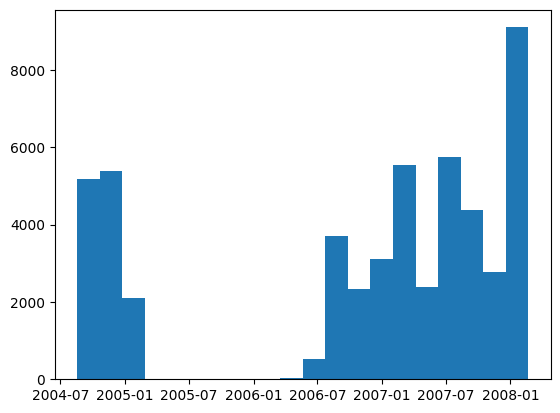

In [14]:
news_df['timestamp'].hist(grid=False, bins=20);

Now that we've managed the NaN timestamp and converted the column to datetime format, we can use useful operations of datetime objects.  
Note also on the histogram that we have a gap without any (or few) news, but also that they seem all plausible timestamp because the range is 07-2004 ~ 01-2008

---

In [15]:
news_df['label'].value_counts() / news_df.shape[0] * 100

label
0    29.428604
5    16.316862
2    13.951773
1    13.235496
3    12.471718
4    10.717902
6     3.877645
Name: count, dtype: float64

<Axes: >

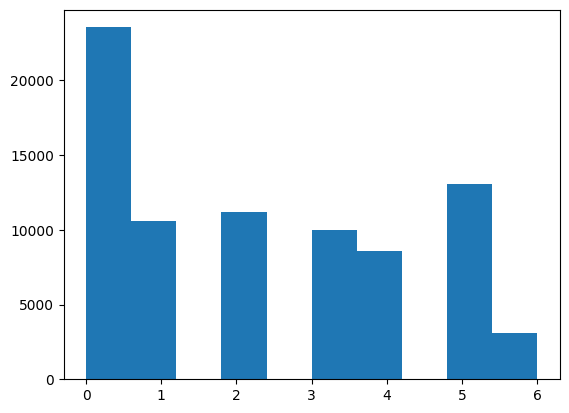

In [16]:
news_df['label'].hist(grid=False)

It looks like an unbalanced problem, so this is something that we should take into account in the next phase.

---

In [17]:
null_article_idx = news_df[news_df['title'].isna()].index
print(news_df.loc[null_article_idx])

       source title article  page_rank           timestamp  label
Id                                                               
26038  Forbes   NaN      \N          5 2004-11-19 23:47:53      1


Pretty useless observation; the first approach is to eliminate, but maybe in the future we can use specific hard coded rules, when we do not have boht title and article but we do have the other cols.

In [18]:
news_df.drop(null_article_idx, inplace=True)

In [19]:
news_df[news_df['article'].str.len() < 10]

,source,title,article,page_rank,timestamp,label
Id,,,,,,
86,International,The Workplace: It&#x27;s called mobbing,\N,5,2007-02-05 19:22:08,1
91,CNN,Iraqi interim president: Insurgents gone in a ...,\N,5,2004-12-09 08:22:49,5
127,CNN,Tsunami doctors badly hit in Indonesia,\N,5,NaT,5
151,International,Spotlight: Recruiting the recruiter,\N,5,2006-09-22 23:48:41,1
152,International,Gabonese hope for windfall as Chinese develop ...,\N,5,2007-02-26 14:49:23,1
...,...,...,...,...,...,...
79739,CNN,U.S.: 109 insurgents killed,\N,5,2004-10-02 20:18:46,5
79792,Forbes,Complete Coverage: Leadership,\N,5,2007-10-30 14:33:24,1
79839,CNN,Hong Kong Democrats demand recount,\N,5,2004-09-13 19:04:44,5


We do have some others observations without any article